#Кластеризация

##Часть 1

Функция для создания набора данных.

In [ ]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

Использование функции для создания набора данных.

In [ ]:
train = make_data(35, 15) # n=35, seed=15
test = make_data(35, 20) # n=35, seed=20
train

,x,y
86,198.373486,1.116291
63,129.951098,4.411453
53,143.331648,4.139891
62,116.270995,4.375191
44,121.668507,4.410981
...,...,...
72,167.690558,2.214971
87,161.728618,1.424347
61,99.040559,3.089104
30,23.765095,0.632106


Данные стандартизуются при помощи StandartScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создание

scaler.fit(train) # обучение

# преобразование
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

С помощью метода .fit_predict обучается модель на тренировочных данных для кластеризации методом Kmeans для трёх кластеров.

In [ ]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3) # создание объекта модели с указанием числа кластеров - 3

labels_train_3 = kmeans_3.fit_predict(train_scaled) # обучение модели на тренировочных данных и получение метки кластеров

# вывод меток кластеров
print(labels_train_3)

[2 0 0 0 0 0 2 0 2 0 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 0 1 2 2 2 2 2 1 0 2 1
 2 1 2 0 1 0 0 2 1 2 0 2 0 0 0 1 2 0 0 2 1 1 0 1 0 1 1 2 0 1 1 0 0 2 0 1 0
 2 0 2 0 2 2 0 0 1 1 2 1 1 2 1 2 0 2 1 1 0 1 1 1 0 0 2 2 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Визуализация данных при помощи skatter.

Text(0.5, 1.0, 'Визуализация класстеризации методом kmeans для train 3 кластера')

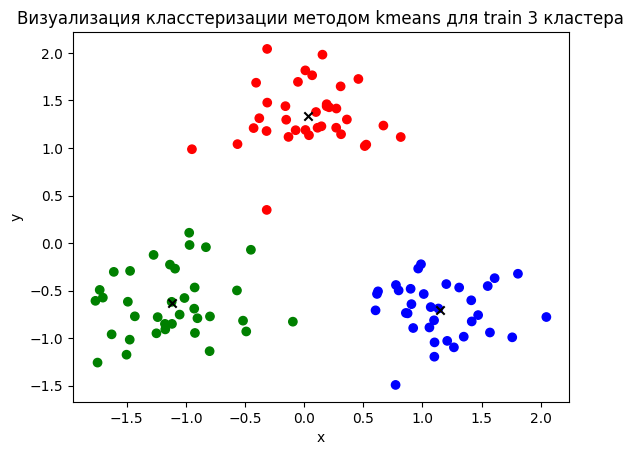

In [ ]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue'] # набор цветов для графика

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c=[colors[i] for i in labels_train_3]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для train 3 кластера')

На графике изображены три кластера с центрами, обозначенными крестиками. Правый нижний кластер имеет наибольшую плотность и наименьший размер. Центры каждого кластера, отмеченные крестиком показывают какие значения х и у характерны для каждого кластера.

Кластеризация методом Kmeans основана на минимизации суммы квадратов расстояний между точками и центрами кластеров. Это означает, что этот метод пытается сделать кластеры как можно более однородными и разделенными друг от друга. Однако, этот метод не всегда находит оптимальное решение, и его результат зависит от выбора начальных центров кластеров.

На тестовых данных выполняется предсказание с помощью predict и визуализируется кластеризация.

Text(0.5, 1.0, 'Визуализация класстеризации методом kmeans для test 3 кластера')

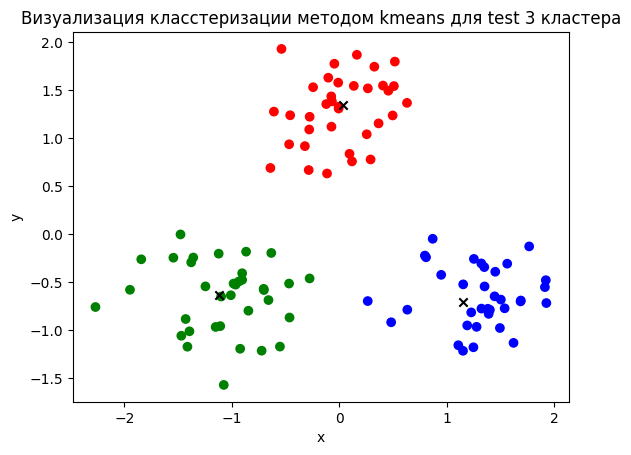

In [ ]:
labels_test_3 = kmeans_3.predict(test_scaled) # обучение модели на тестовых данных

plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c=[colors[i] for i in labels_test_3]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для test 3 кластера')

На основе визуализации кластеризации можно сказать, что верхний центральный кластер имеет высокую плотность и наименьшим образом разбросан от центра, то есть имеет наименьший размер.

Подсчет коэффициента силуэта.

In [ ]:
from sklearn.metrics import silhouette_score

score_train_3 = silhouette_score(train_scaled, labels_train_3)
score_test_3 = silhouette_score(test_scaled, labels_test_3)
print('Коэффициент силуэта для тренировочного набора 3 кластера:', score_train_3)
print('Коэффициент силуэта для тестового набора 3 кластера:', score_test_3)

Коэффициент силуэта для тренировочного набора 3 кластера: 0.706332419766215
Коэффициент силуэта для тестового набора 3 кластера: 0.6930898421231698


Коэффициент силуэта - это мера того, насколько хорошо объекты распределены по кластерам, основанная на расстояниях между ними. Чем ближе коэффициент силуэта к 1, тем лучше качество кластеризации.

На основе коэффициентов силуэта для тренировочного и тестового набора данных можно сказать, что они достаточно близки и высоки, что свидетельствует о том, что модель кластеризации хорошо работает на обоих наборах данных и не переобучается.

Обучение модели для кластеризации для 2 кластеров на тренировочных и тестовых наборах данных. Также для каждого приведена визуализация.

[0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


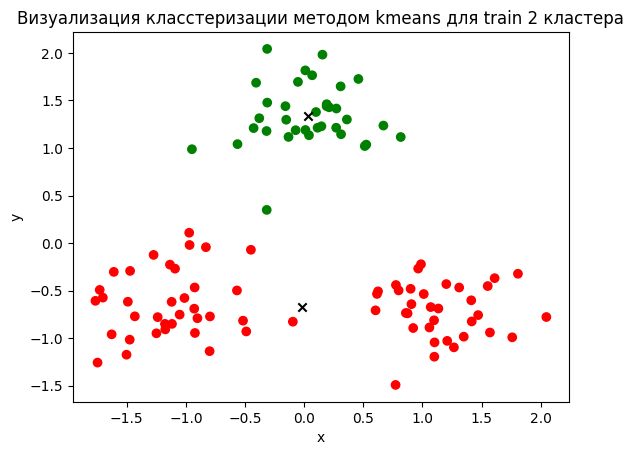

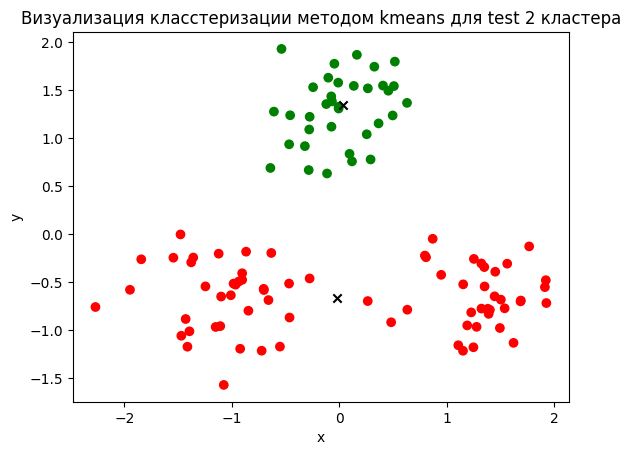

Коэффициент силуэта для тренировочного набора 2 кластера: 0.48782545919917286
Коэффициент силуэта для тестового набора 2 кластера: 0.45871925011279335


In [ ]:
kmeans_2 = KMeans(n_clusters=2) # создание объекта модели с указанием числа кластеров - 2

labels_train_2 = kmeans_2.fit_predict(train_scaled) # обучение модели на тренировочных данных и получение метки кластеров

# вывод меток кластеров
print(labels_train_2)

colors_2 = ['red', 'green'] # набор цветов для графика

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c=[colors_2[i] for i in labels_train_2]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для train 2 кластера')
plt.show()

labels_test_2 = kmeans_2.predict(test_scaled) # обучение модели на тестовых данных

plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c=[colors_2[i] for i in labels_test_2]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для test 2 кластера')
plt.show()

score_train_2 = silhouette_score(train_scaled, labels_train_2)
score_test_2 = silhouette_score(test_scaled, labels_test_2)
print('Коэффициент силуэта для тренировочного набора 2 кластера:', score_train_2)
print('Коэффициент силуэта для тестового набора 2 кластера:', score_test_2)

На визуализации кластеризации видно, что данные разделенные на два кластера очень разрознены в нижнем. Это говорит о том, что нижний кластер стоило бы разделить на два, так как точки, принадлежащие этому кластеру очень разбросаны по оси у.

Cравнивая коэффициенты силуэта для тренировочного и тестового наборов с двумя кластерами, можно сказать, что они достаточно близки, но низки, что свидетельствует о том, что модель кластеризации не очень хорошо разделяет данные на два кластера и имеет много перекрывающихся объектов (данные различных кластеров, находящихся близко друг к другу).

На основе этого всего можно выдвинуть предположение, что кластеризация на два кластера не есть оптимальная мера при имеющемся наборе данных.

Обучение модели для кластеризации для 4 кластеров на тренировочных и тестовых наборах данных. Также для каждого приведена визуализация.

[0 1 1 1 1 1 0 1 0 1 0 3 2 3 2 3 0 0 3 3 3 2 0 0 0 3 1 3 0 0 0 0 0 2 1 0 2
 0 2 0 1 2 1 1 0 2 0 1 0 1 1 1 2 0 1 1 0 2 3 1 2 1 2 3 0 1 2 3 1 1 0 1 2 1
 0 1 0 1 0 0 1 1 2 2 0 2 3 0 2 0 1 0 3 3 1 2 2 3 1 1 0 0 2 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


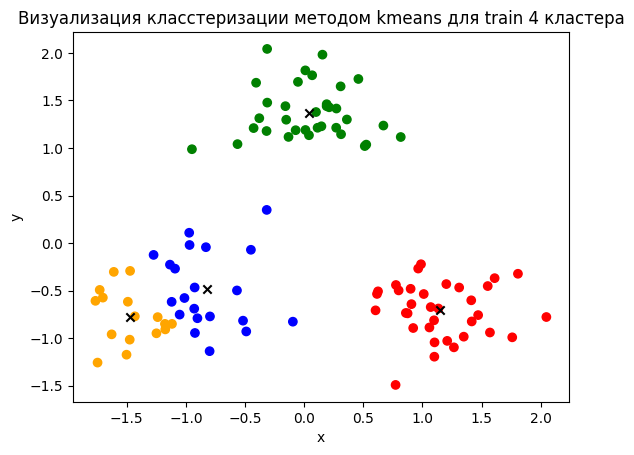

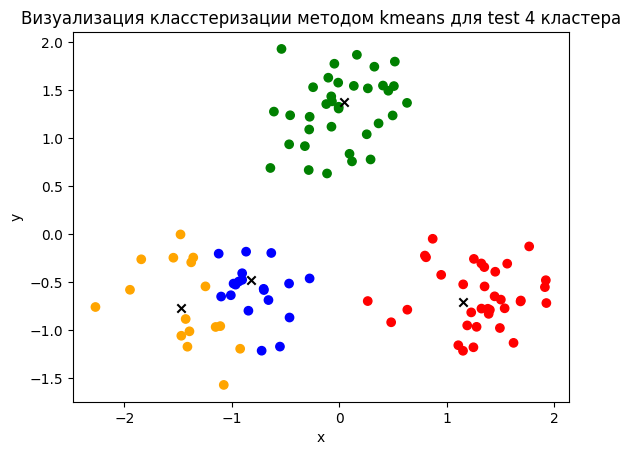

Коэффициент силуэта для тренировочного набора 4 кластера: 0.5717076084735878
Коэффициент силуэта для тестового набора 4 кластера: 0.5609136159761335


In [ ]:
kmeans_4 = KMeans(n_clusters=4) # создание объекта модели с указанием числа кластеров - 4

labels_train_4 = kmeans_4.fit_predict(train_scaled) # обучение модели на тренировочных данных и получение метки кластеров

# вывод меток кластеров
print(labels_train_4)

colors_4 = ['red', 'green', 'blue', 'orange'] # набор цветов для графика

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c=[colors_4[i] for i in labels_train_4]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для train 4 кластера')
plt.show()

labels_test_4 = kmeans_4.predict(test_scaled) # обучение модели на тестовых данных

plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c=[colors_4[i] for i in labels_test_4]) # визуализация каждого кластера различными цветами

plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], marker='x', color='black') # добавление центра кластера в виде крестика

plt.xlabel('x')
plt.ylabel('y')
plt.title('Визуализация класстеризации методом kmeans для test 4 кластера')
plt.show()

score_train_4 = silhouette_score(train_scaled, labels_train_4)
score_test_4 = silhouette_score(test_scaled, labels_test_4)
print('Коэффициент силуэта для тренировочного набора 4 кластера:', score_train_4)
print('Коэффициент силуэта для тестового набора 4 кластера:', score_test_4)

На основе визуализированных кластеров данных видно, что левые нижние кластеры перекрывают друг друга, что приводит к неоднозначности разделения.

Сравнивая коэффициенты силуэта для тренировочного и тестового наборов с четырьмя кластерами, можно сказать, что они достаточно близки и средни, что свидетельствует о том, что модель кластеризации достаточно хорошо разделяет данные на четыре кластера, но имеет некоторые перекрывающиеся объекты.

На основе этого всего можно выдвинуть предположение, что кластеризация на четыре кластера не есть оптимальная мера при имеющемся наборе данных.

Построение графика по методу локтя.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'График по методу локтя')

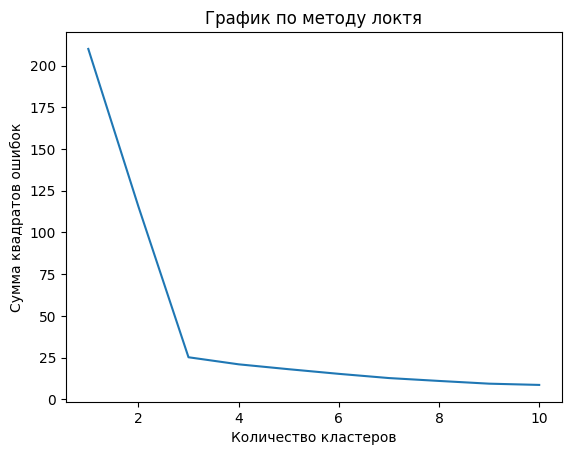

In [ ]:
sse = {} # для хранения ошибок

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)

  kmeans.fit_predict(train_scaled) # обучение модели на тренировочных данных

  sse[k] = kmeans.inertia_ # сохранение суммы квадратов ошибок

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('График по методу локтя')

Данный график визуализирует как меняетмся сумма квадратов ошибок при увеличении количества кластеров. По графику можно определить оптимальную k. Данное значение на графике находится в месте излома графика, то есть в точке с количеством кластеров - 3. Это значение соответствует наилучшему разделению данных на кластеры.

##Часть 2

Загрузка набора данных.

In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('/content/1heart.csv', sep=',')

Saving 1heart.csv to 1heart.csv


Предварительная обработка данных.

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Содержит информацию о сердечных болезнях

1. возраст
2. пол
3. тип боли в груди *(4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])*
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (*норма: нормальная, ST: аномалия ST-T LVN: гипертрофия)*
8. MaxHR: максимальная достигнутая частота сердечных сокращений *[Числовое значение от 60 до 202]*
9. стенокардия, вызванная физической нагрузкой *(да, нет)*
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке *(Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)*
12. HeartDisease: *выходной класс [1: болезнь сердца, 0: нормальный]*

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,925.000000,923.000000,925.000000,924.000000,925.000000,925.000000
mean,53.451892,132.442037,0.231351,136.979437,0.882162,0.550270
std,9.453069,18.464707,0.421925,25.507091,1.064803,0.497736
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


На основе таблицы данных можно сказать, что средний возраст пациентов - 53 года, немного больше половины имеют заболевание сердца. Также можно выяснить максимальные, средние и минимальные значения для таких показателей, как возраст, артериальное давление в покое, уровень сахара в крови натощак, максимальная достигнутая частота сердечных сокращений, депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя.

In [ ]:
df.shape

(925, 12)

В датасете 925 записей и 12 колонок.

In [ ]:
df.isna().sum() #подсчет количества пропусков

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В датасете в некоторых колонках присутствуют пропуски. Так как все данные, замененные 0 в числовых ячейках повлияют на кластеризацию. Производится удаление всех пустых записей. А затем подсчет количества пропусков для проверки удаления.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Все пропуски данных были успешно удалены.

In [ ]:
df.duplicated().sum() # подсчет количества дубликатов

3

Так как обнаружены дубликаты, они удаляются и осуществляется проверка удаления.

In [ ]:
df = df.drop_duplicates() # удаление дубликатов
df.duplicated().sum()

0

Все явные дубликаты устранены.

In [ ]:
df.reset_index(drop=True, inplace=True) # обновление индексации; аргумент drop, чтобы не создавать столбец index

Для каждого текстового столбца осуществляется поиск уникальных значений и при наличии дубликатов устранение их.

In [ ]:
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F' 'Ma']


Обнаружены дубликаты. Необходимо заменить 'Ma' на 'М'. Также осуществляется проверка.

In [ ]:
df['Sex'].replace('Ma', 'M', inplace=True)
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F']


<ipython-input-23-23355d7716d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'].replace('Ma', 'M', inplace=True)


Успешное устранение.

In [ ]:
print(df['ChestPainType'].unique()) # Поиск уникальных значений в столбце "ChestPainType"

['ATA' 'NAP' 'ASY' 'TA']


Дубликаты не обнаружены.

In [ ]:
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

Так как это числа, данные не нуждаются в вычислении дубликатов. Однако есть числа с буквами, которые стоит заменить. Также сделана проверка для того, чтобы убедиться в корректной замене.

In [ ]:
df['Cholesterol'].replace('a241', '241', inplace=True)
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

<ipython-input-26-a1dfe7792fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].replace('a241', '241', inplace=True)


Неявные дубликаты устранены.

In [ ]:
print(df['RestingECG'].unique()) # Поиск уникальных значений в столбце "RestingECG"

['Normal' 'ST' 'LVH']


Дубликаты не обнаружены.

In [ ]:
print(df['ExerciseAngina'].unique()) # Поиск уникальных значений в столбце "ExerciseAngina"

['N' 'Y']


Дубликаты не обнаружены.

In [ ]:
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down' 'UP']


Обнаружен дубликат. Нужно 'UP' заменит на 'Up'. После замены осуществляется проверка.

In [ ]:
df['ST_Slope'].replace('UP', 'Up', inplace=True)
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down']


Дубликат устранен.

Ранее было замечено несоответствие данных колонки "Cholesterol" типу текстовому. Соответственно требуется изменить его на float. После изменения производится проверка.

In [ ]:
df['Cholesterol'] = df['Cholesterol'].astype(float)
df['Cholesterol'].dtypes

dtype('float64')

Тип успешно изменен.

Целевой переменной данного датафрейма является 'HeartDisease', которая показывает, есть ли у человека сердечное заболевание или нет.

Построена матрица диаграмм рассеяния, где значения целевой переменной выделены разными цветами.

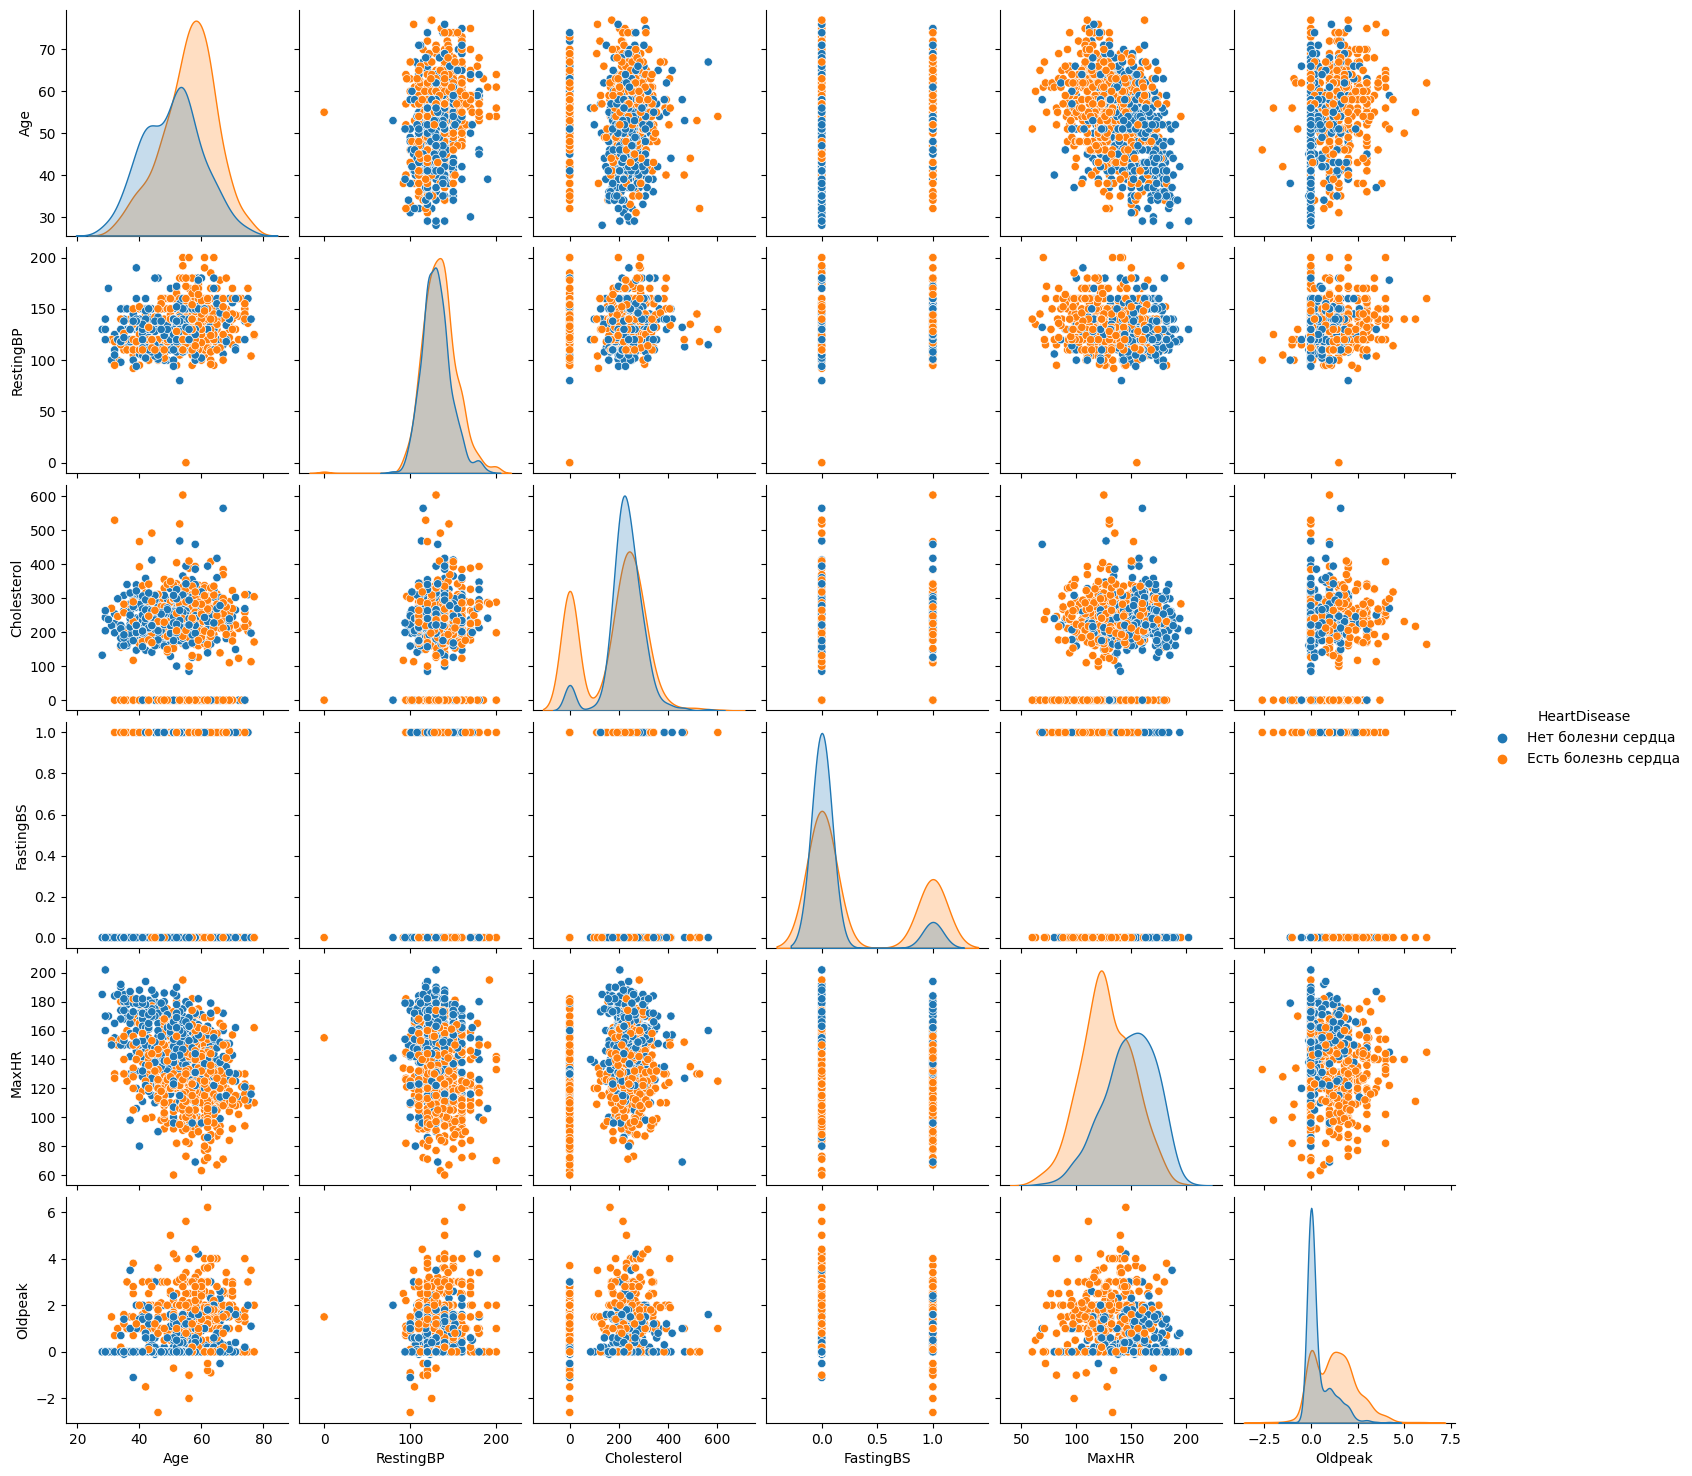

In [ ]:
import seaborn as sns
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

m = df
m['HeartDisease'] = m['HeartDisease'].replace(to_replace=[0, 1], value=['Нет болезни сердца', 'Есть болезнь сердца']) # замена числовых значений на текстовые
sns.pairplot(data=m, hue='HeartDisease')

На диагонали матрицы показаны графики плотности распределения каждой переменной. На недиагональных элементах показаны диаграммы рассеяния между парами переменных. Каждая точка на диаграмме рассеяния имеет цвет в зависимости от значения целевой переменной. Это помогает увидеть, как целевая переменная связана с другими переменными и какие переменные имеют сильную или слабую корреляцию между собой.

Анализ матрицы рассеяния:

У людей без сердечных заболеваний низкий уровень сахара натощак преимущественно в возрасте до 40, после возможны повышенные значения. У тех, у кого есть болезни сердца, чаще всего имеют повышенный уровень сахара, особенно в молодом возрасте до 40 лет этот показатель явно выделяет их на фоне здоровых людей. (FastingBS - Age) Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми в основном в возрасте до 60 лет. Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца всех возрастов. (MaxHR - Age, MaxHR - RestingBP, MaxHR - Cholesterol) Депрессия, вызванная нагрузкой, выше у пациентов с сердечными заболеваниями, большинство значений нижней границы принадлежит здоровым людям. (Oldpeak - Age, Oldpeak - RestingBP) Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми, Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца, причем уровень сахара на это не влияет (имеются значения как высокие, так и низкие, при одинаковом значении частоты сокращений). (MaxHR - FastingBS) Максимальные и минимальные значения депресси, вызванной нагрузкой, принадлежат пациентам с заболеваниями сердца. Максимум доятигается при нормальном уровне сахара, а минимум при повышенном. Значения дипресси близкие к средним и к 0 принадлежат преимущественно здоровым людям. (Oldpeak - FastingBS) Большинство значений ниже среднего макисмальной частоты сердечных сокращений и при этом преимущественно высоких значений депрессии при высоких нагрузках принадлежит людям с сердечными заболеваниями. Большинство значений выше среднего макисмальной частоты сердечных сокращений и при этом преимущественно низких значений депрессии при высоких нагрузках принадлежит здоровым людям. (Oldpeak - MaxHR)

Выполнение стандартизации числовых данных при помощи StandartScaler.

In [ ]:
X_num = X.select_dtypes(include='number') # выбираются только числовые столбцы

scaler = StandardScaler() # создание

scaler.fit(X_num) # обучение

# преобразование
X_scaled = scaler.transform(X_num)

Для данных подбирается оптимальное количество кластеров по методу локтя.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'График по методу локтя')

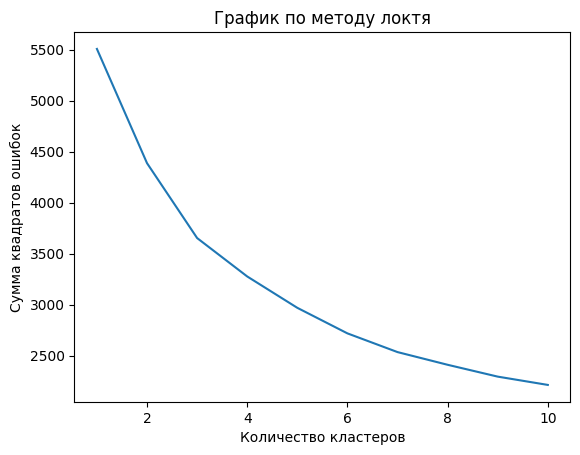

In [ ]:
wcss = {}

for i in range(1,11):
  kmeans_find = KMeans(n_clusters=i)
  kmeans_find.fit_predict(X_scaled)
  wcss[i] = kmeans_find.inertia_ # сохранение суммы квадратов ошибок

plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('График по методу локтя')

На графике видно, что изменения, изломы, встречаются несколько раз. Количество 2, 3, 4, 6, 7 подходят для кластеризации модели.

Однако в данном случае можно сказать, что метод локтя не работает, так как показывает больше одного значения. Поэтому стоит выбирать количество кластеров основываясь на коэффициенте силуэта.

Для выбора оптимального значения количества кластеров для каждого из подходящих значений производится построение модели, обучение и визуализация кластеризации данных. Также производится оценка на основе метрики качества.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

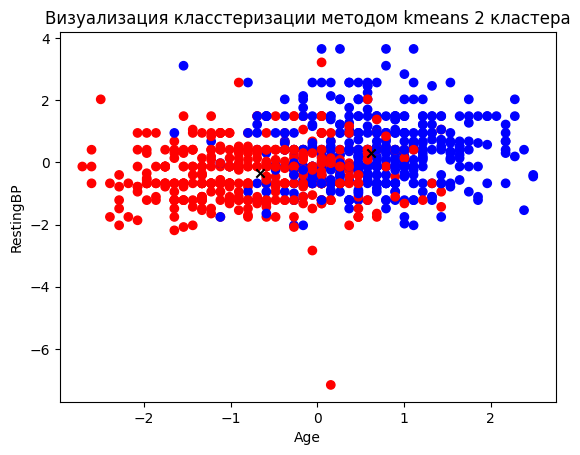

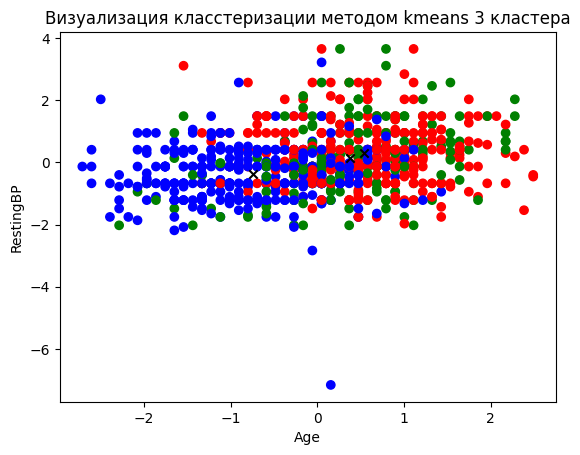

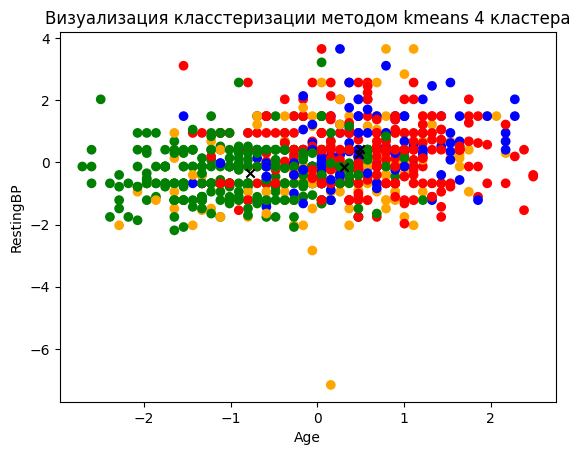

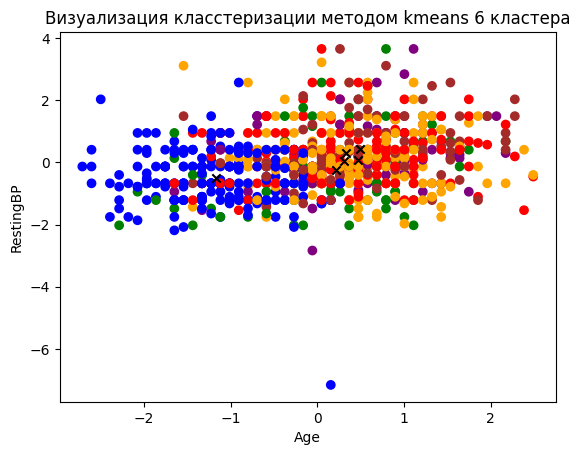

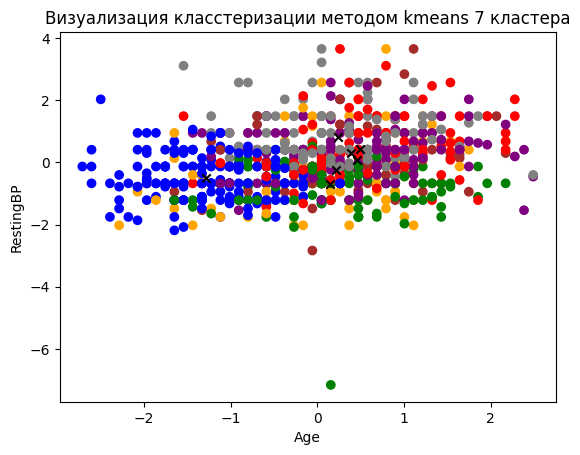

Коэффициент силуэта для 2 кластеров: 0.19573513945736315
Коэффициент силуэта для 3 кластеров: 0.21373101750410378
Коэффициент силуэта для 4 кластеров: 0.22145689196829388
Коэффициент силуэта для 6 кластеров: 0.2075669985425257
Коэффициент силуэта для 7 кластеров: 0.20250608969916323


In [ ]:
kmeans_find_2 = KMeans(n_clusters=2)
kmeans_find_3 = KMeans(n_clusters=3)
kmeans_find_4 = KMeans(n_clusters=4)
kmeans_find_6 = KMeans(n_clusters=6)
kmeans_find_7 = KMeans(n_clusters=7)

labels_2 = kmeans_find_2.fit_predict(X_scaled)
labels_3 = kmeans_find_3.fit_predict(X_scaled)
labels_4 = kmeans_find_4.fit_predict(X_scaled)
labels_6 = kmeans_find_6.fit_predict(X_scaled)
labels_7 = kmeans_find_7.fit_predict(X_scaled)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'gray'] # набор цветов для графика

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[i] for i in labels_2])
plt.scatter(kmeans_find_2.cluster_centers_[:, 0], kmeans_find_2.cluster_centers_[:, 1], marker='x', color='black')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Визуализация класстеризации методом kmeans 2 кластера')
plt.show()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[i] for i in labels_3])
plt.scatter(kmeans_find_3.cluster_centers_[:, 0], kmeans_find_3.cluster_centers_[:, 1], marker='x', color='black')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Визуализация класстеризации методом kmeans 3 кластера')
plt.show()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[i] for i in labels_4])
plt.scatter(kmeans_find_4.cluster_centers_[:, 0], kmeans_find_4.cluster_centers_[:, 1], marker='x', color='black')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Визуализация класстеризации методом kmeans 4 кластера')
plt.show()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[i] for i in labels_6])
plt.scatter(kmeans_find_6.cluster_centers_[:, 0], kmeans_find_6.cluster_centers_[:, 1], marker='x', color='black')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Визуализация класстеризации методом kmeans 6 кластера')
plt.show()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=[colors[i] for i in labels_7])
plt.scatter(kmeans_find_7.cluster_centers_[:, 0], kmeans_find_7.cluster_centers_[:, 1], marker='x', color='black')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Визуализация класстеризации методом kmeans 7 кластера')
plt.show()

score_2 = silhouette_score(X_scaled, labels_2)
score_3 = silhouette_score(X_scaled, labels_3)
score_4 = silhouette_score(X_scaled, labels_4)
score_6 = silhouette_score(X_scaled, labels_6)
score_7 = silhouette_score(X_scaled, labels_7)
print('Коэффициент силуэта для 2 кластеров:', score_2)
print('Коэффициент силуэта для 3 кластеров:', score_3)
print('Коэффициент силуэта для 4 кластеров:', score_4)
print('Коэффициент силуэта для 6 кластеров:', score_6)
print('Коэффициент силуэта для 7 кластеров:', score_7)

Коэффициент силуэта — это мера того, насколько хорошо объект принадлежит своему кластеру по сравнению с другими кластерами. Он может принимать значения от -1 до 1, где высокое значение означает, что объект хорошо согласуется со своим кластером и плохо согласуется с соседними кластерами.

Сравнивая коэффициенты силуэта для разных значений k, можно заметить, что они возрастают до k=4, а затем начинают уменьшаться. Это означает, что при k=4 данные наиболее хорошо разделены на кластеры, и добавление большего количества кластеров не улучшает качество кластеризации. Таким образом, оптимальное количество кластеров для этих данных равно 4.

Определение объектов, относящихся к каждому кластеру.

In [ ]:
X_cluster = pd.DataFrame(X_scaled)
X_num['cluster'] = kmeans_find_4.labels_

print(X_num) # вывод данных с номерами кластеров

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  cluster
0     40      140.0        289.0          0  172.0      0.0        2
1     49      160.0        180.0          0  156.0      1.0        2
2     37      130.0        283.0          0   98.0      0.0        2
3     48      138.0        214.0          0  108.0      1.5        1
4     54      150.0        195.0          0  122.0      0.0        1
..   ...        ...          ...        ...    ...      ...      ...
913   57      130.0        131.0          0  115.0      1.2        1
914   57      130.0        236.0          0  174.0      0.0        2
915   38      138.0        175.0          0  173.0      0.0        2
916   57      140.0        241.0          0  123.0      0.2        1
917   56      130.0        221.0          0  163.0      0.0        2

[918 rows x 7 columns]


Подсчет средних значений по каждому признаку каждого кластера.

In [ ]:
means = X_num.groupby('cluster').mean() # подсчет среднего значения для каждого кластера
means

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
cluster,,,,,,
0,58.219512,140.186992,252.292683,1.000000,133.959350,1.044715
1,58.023729,137.701695,250.054237,0.000000,126.749153,1.543051
2,46.258359,126.048632,235.927052,0.006079,154.814590,0.267477
3,56.467836,129.970760,0.736842,0.520468,121.473684,0.836842


Исходя из средних значений, которые показаны в таблице, можно судить о разделении данных на кластеры. Для кластера 0 - средние значения возраста - 58, артериального давления в покое - 140, холестерина сыворотки - 252, уровень сахара в крови - повышенный, максимальная частота достигнутых сердечных сокращений - 134, депрессия, вызванная физической нагрузкой по сравнению с состоянием покоя - 1. Для кластера 1 - средние значения возраста - 58, артериального давления в покое - 138, холестерина сыворотки - 250, уровень сахара в крови - нормальный, максимальная частота достигнутых сердечных сокращений - 127, депрессия, вызванная физической нагрузкой по сравнению с состоянием покоя - 2. Для кластера 2 - средние значения возраста - 46, артериального давления в покое - 126, холестерина сыворотки - 236, уровень сахара в крови - нормальный, максимальная частота достигнутых сердечных сокращений - 155, депрессия, вызванная физической нагрузкой по сравнению с состоянием покоя - 0. Для кластера 3 - средние значения возраста - 56, артериального давления в покое - 130, холестерина сыворотки - 1, уровень сахара в крови - повышенный, максимальная частота достигнутых сердечных сокращений - 121, депрессия, вызванная физической нагрузкой по сравнению с состоянием покоя - 1.

Можно заметить, что значения артериального давления с возрастом увеличиваются. Значения холестерина и сахара в крови сильно колеблются, что говорит об отсутствии корреляции с возрастом. Однозначную тенденцию в кластеризации данных вычленить сложно скорее всего из-за сильной разрозненности данных.

Вычисление метрик качества кластеризации.

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

y_pred = kmeans_find_4.labels_

ad1 = adjusted_rand_score(y, y_pred)
ad2 = adjusted_mutual_info_score(y, y_pred)

print(f'Adjusted Rand Index: {ad1}')
print(f'Adjusted Mutual Information: {ad2}')

Adjusted Rand Index: 0.14209271945402394
Adjusted Mutual Information: 0.1432219351374052


Метрика ARI (Adjusted Rand Index) измеряет сходство между полученными метками и базовыми метками, которые были установлены заранее, игнорируя перестановки.
Метрика AMI (Adjusted Mutual Information) – оценка на основе взаимной информации, которая измеряет согласованность двух назначений, вычисляется с использованием функции энтропии.

Adjusted Rand Index (ARI) и Adjusted Mutual Information (AMI) — это метрики, которые измеряют сходство между двумя кластеризациями, учитывая случайное совпадение. Они принимают значения от -0.5 до 1, где 1 означает идеальное совпадение, 0 означает среднее значение для случайных кластеризаций, а -0.5 означает очень плохое согласование.

Значения ARI и AMI равны примерно 0.14, что означает, что кластеризации имеют небольшое сходство, но не очень высокое. Это может быть связано с тем, что кластеры не хорошо разделяют данные, или что данные имеют сложную структуру, которую трудно выделить.

Выполнение кластеризации иерархическим агломеративным методом.

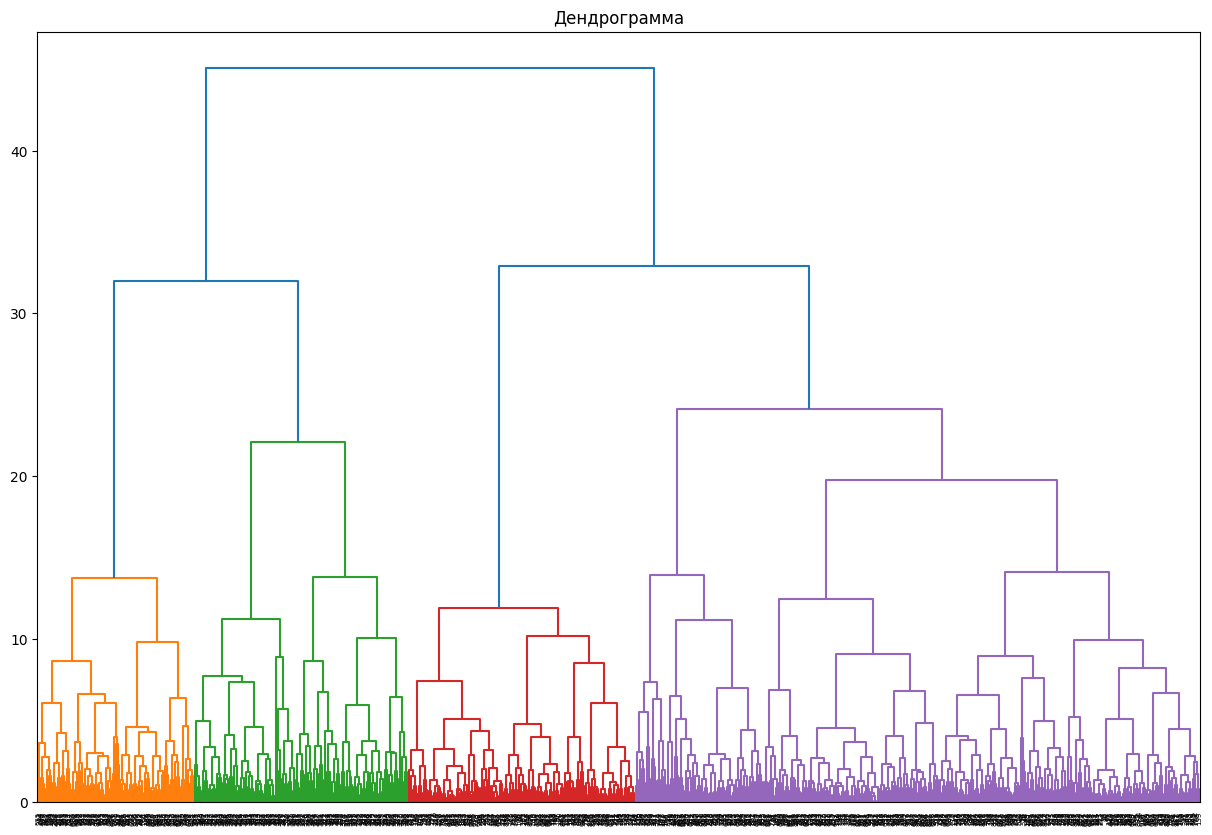

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# создание объекта AgglomerativeClustering
agg = AgglomerativeClustering()

agg.fit(X_scaled) # обучение модели

y_pred_agg = agg.labels_

linked = linkage(X_scaled, method = 'ward')

# Визуализация дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()

Дендрограмма — это графическое представление иерархической кластеризации, которое показывает, как объекты объединяются в кластеры на разных уровнях. Расстояние между объединяемыми кластерами отражает их сходство или различие. Чем меньше расстояние, тем больше сходство между кластерами. По ходу подъема определяется оптимальное количество кластеров для данных, выбирается уровень, на котором кластеры хорошо разделены и имеют смысл с точки зрения задачи.

Для полученной дендрограммы можно выявить два различных количества кластеров - 2 или 4.

Для иерархического агломеративного метода расчитаны метрики качества.

In [ ]:
ad1_agg = adjusted_rand_score(y, y_pred_agg)
ad2_agg = adjusted_mutual_info_score(y, y_pred_agg)

print(f'Adjusted Rand Index: {ad1_agg}')
print(f'Adjusted Mutual Information: {ad2_agg}')

Adjusted Rand Index: 0.0648881691054871
Adjusted Mutual Information: 0.08257456179788736


Сравнение методов:

В процессе анализа датасета о сердечных болезнях были применены различные методы кластеризации данных: метод k-средних и иерархический агломеративный метод. Исходя из полученных данных можно сказать, что второй метод намного хуже, чем первый. Данное предположение основано на данных метрик. Коэффициент силуэта одинаковый, однако это лишь говорит о том, что данные распределены по кластерам плохо обоими методами.

**Вывод**

В процессе выплнения работы были изучены алгоритмы и методы кластеризации на практике.

В ходе работы был проанализирован датасет с набором данных о сердечных болезнях. Исходя из полученных данных можно сказать, что количество данных о людях с сердечными болезнями и здоровых людях примерно одинаково.

У людей без сердечных заболеваний низкий уровень сахара натощак преимущественно в возрасте до 40, после возможны повышенные значения. У тех, у кого есть болезни сердца, чаще всего имеют повышенный уровень сахара, особенно в молодом возрасте до 40 лет этот показатель явно выделяет их на фоне здоровых людей. Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми в основном в возрасте до 60 лет. Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца всех возрастов. Депрессия, вызванная нагрузкой, выше у пациентов с сердечными заболеваниями, большинство значений нижней границы принадлежит здоровым людям. Высокие значения макисмальной частоты сердечных сокращений достигается преимущественно здоровыми людьми, Среднее и низкое большинство значений принадлежат людям с заболеваниями сердца, причем уровень сахара на это не влияет. Максимальные и минимальные значения депресси, вызванной нагрузкой, принадлежат пациентам с заболеваниями сердца. Максимум доятигается при нормальном уровне сахара, а минимум при повышенном. Значения дипресси близкие к средним и к 0 принадлежат преимущественно здоровым людям. Большинство значений ниже среднего макисмальной частоты сердечных сокращений и при этом преимущественно высоких значений депрессии при высоких нагрузках принадлежит людям с сердечными заболеваниями. Большинство значений выше среднего макисмальной частоты сердечных сокращений и при этом преимущественно низких значений депрессии при высоких нагрузках принадлежит здоровым людям.

Основываясь на методе локтя не удалось выявить оптимальное количество кластеров для разделения имеющихся данных, так как на графике было больше одного излома. На основе сравнения коэффициентов силуэта 4 кластера являются оптимальным числом. Это означает, что при k=4 данные наиболее хорошо разделены на кластеры, и добавление большего количества кластеров не улучшает качество кластеризации.

Исходя из средних занчений данных для каждого кластера можно выявить некоторые закономерности разделения. Можно заметить, что значения артериального давления с возрастом увеличиваются. Значения холестерина и сахара в крови сильно колеблются, что говорит об отсутствии кореляции с возрастом. Однозначную тенденцию в кластеризации данных вычленить сложно скорее всего из-за сильной разрозненности данных.

Значения метрик ARI и AMI равны примерно 0.14, что означает, что кластеризации имеют небольшое сходство, но не очень высокое. Это может быть связано с тем, что кластеры не хорошо разделяют данные, или что данные имеют сложную структуру, которую трудно выделить.

Дендрограмма — это графическое представление иерархической кластеризации, которое показывает, как объекты объединяются в кластеры на разных уровнях. Расстояние между объединяемыми кластерами отражает их сходство или различие. Чем меньше расстояние, тем больше сходство между кластерами. По ходу подъема определяется оптимальное количество кластеров для данных, выбирается уровень, на котором кластеры хорошо разделены и имеют смысл с точки зрения задачи. Для дендрограммы по датасету можно выявить два различных количества кластеров - 2 или 4.

В процессе анализа датасета о сердечных болезнях были применены различные методы кластеризации данных: метод k-средних и иерархический агломеративный метод. Исходя из полученных данных можно сказать, что второй метод намного хуже, чем первый. Данное предположение основано на данных метрик. Коэффициент силуэта одинаковый, однако это лишь говорит о том, что данные распределены по кластерам плохо обоими методами.

##Дополнительное задание:
**Задание 7:**
Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить полученные итоговые метрики с теми, что были получены на данных, нормализованных с помощью StandardScaler.

Для нормализации значений для обучения модели кластеризации используется MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'График по методу локтя MinMaxScaler')

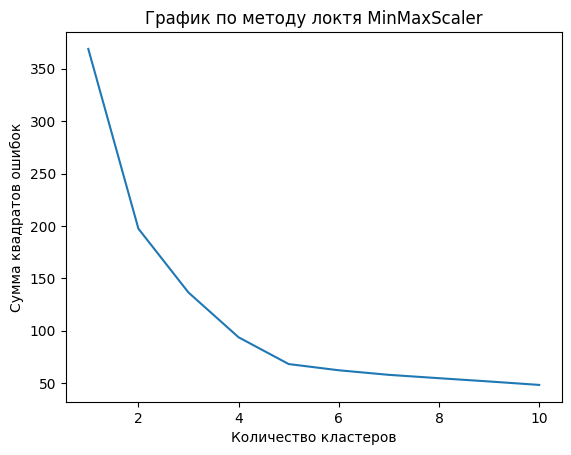

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# объект MinMaxScaler с диапазоном от 0 до 1
scaler_m = MinMaxScaler()

# Выполняем нормализацию данных с помощью метода fit_transform
X_num_m = scaler_m.fit_transform(X_num)

wcss_m = {}

mas =[]

for i in range(1,11):
  kmeans_m = KMeans(n_clusters=i)
  kmeans_m.fit_predict(X_num_m)
  labels = kmeans_m.labels_
  if i==1:
    mas.append(0)
  else:
    mas.append(silhouette_score(X_num_m, labels))
  wcss_m[i] = kmeans_m.inertia_ # сохранение суммы квадратов ошибок

plt.plot(list(wcss_m.keys()), list(wcss_m.values()))
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('График по методу локтя MinMaxScaler')

Так как на графике не видно точного одного излома линии, а есть множество различных, метод локтя не помог выделить оптимальное количество кластеров. Для определения в таком случае стоит воспользоваться сравнительным анализом значений коэффициента силуэта.

In [ ]:
for i in range(len(mas)):
  print('Кластер', i+1, 'Коэффициент силуэта', mas[i])
print("Максимальное занчение коэффициента силуэта", max(mas))

Кластер 1 Коэффициент силуэта 0
Кластер 2 Коэффициент силуэта 0.5308388185344071
Кластер 3 Коэффициент силуэта 0.5661671085165841
Кластер 4 Коэффициент силуэта 0.42606174996517066
Кластер 5 Коэффициент силуэта 0.471778410820356
Кластер 6 Коэффициент силуэта 0.38739574631083085
Кластер 7 Коэффициент силуэта 0.35003076723604715
Кластер 8 Коэффициент силуэта 0.3471459881864802
Кластер 9 Коэффициент силуэта 0.2944252299249341
Кластер 10 Коэффициент силуэта 0.25499582876415694
Максимальное занчение коэффициента силуэта 0.5661671085165841


Исходя из сравнения коэффициентов силуэта для расличного количества кластеров можно заметить, что наиболее корректно данные разделяются на 3 кластера.

Тогда выводятся метрики качества кластеризации для метода к-средних с количеством кластеров - 3 и для иерархического агломеративного.

In [ ]:
kmeans_MMS_3 = KMeans(n_clusters=3)
labels_MMS_3 = kmeans_MMS_3.fit_predict(X_num_m)

y_pred_MMS_3 = kmeans_MMS_3.labels_

# создание объекта AgglomerativeClustering
agg_MMS = AgglomerativeClustering()

agg_MMS.fit(X_num_m) # обучение модели

y_pred_agg_MMS = agg_MMS.labels_

ad1 = adjusted_rand_score(y, y_pred_MMS_3)
ad2 = adjusted_mutual_info_score(y, y_pred_MMS_3)

print("KMEANS")
print(f'Adjusted Rand Index: {ad1}')
print(f'Adjusted Mutual Information: {ad2}')

ad1_agg = adjusted_rand_score(y, y_pred_agg_MMS)
ad2_agg = adjusted_mutual_info_score(y, y_pred_agg_MMS)

print("AGGLOMERATIVE CLUSTREUNG")
print(f'Adjusted Rand Index: {ad1_agg}')
print(f'Adjusted Mutual Information: {ad2_agg}')

KMEANS
Adjusted Rand Index: 0.007322263124496585
Adjusted Mutual Information: 0.07991029388597011
AGGLOMERATIVE CLUSTREUNG
Adjusted Rand Index: 0.02336146146353338
Adjusted Mutual Information: 0.06048946841332614


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Для нормализации значений для обучения модели кластеризации используется MaxAbsScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'График по методу локтя MaxAbsScaler')

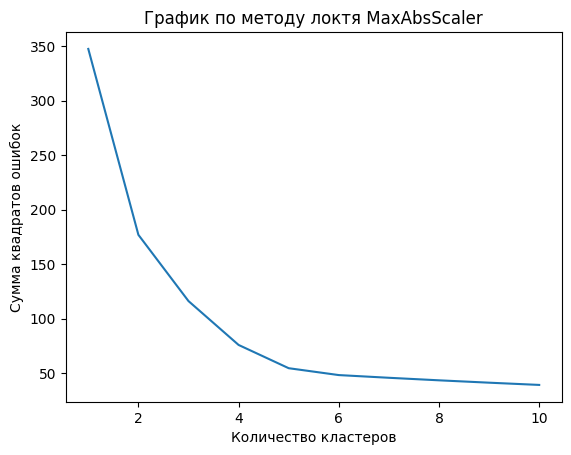

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# объект MinMaxScaler с диапазоном от 0 до 1
scaler_a = MaxAbsScaler()

# Выполняем нормализацию данных с помощью метода fit_transform
X_num_a = scaler_a.fit_transform(X_num)

wcss_a = {}

mas_a =[]

for i in range(1,11):
  kmeans_a = KMeans(n_clusters=i)
  kmeans_a.fit_predict(X_num_a)
  labels = kmeans_a.labels_
  if i==1:
    mas_a.append(0)
  else:
    mas_a.append(silhouette_score(X_num_a, labels))
  wcss_a[i] = kmeans_a.inertia_ # сохранение суммы квадратов ошибок

plt.plot(list(wcss_a.keys()), list(wcss_a.values()))
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок')
plt.title('График по методу локтя MaxAbsScaler')

Так как на графике не видно точного одного излома линии, а есть множество различных, метод локтя не помог выделить оптимальное количество кластеров. Для определения в таком случае стоит воспользоваться сравнительным анализом значений коэффициента силуэта.

In [ ]:
for i in range(len(mas_a)):
  print('Кластер', i+1, 'Коэффициент силуэта', mas_a[i])
print("Максимальное значение коэффициента силуэта", max(mas_a))

Кластер 1 Коэффициент силуэта 0
Кластер 2 Коэффициент силуэта 0.5564577750070879
Кластер 3 Коэффициент силуэта 0.5966071251646786
Кластер 4 Коэффициент силуэта 0.4584048554406014
Кластер 5 Коэффициент силуэта 0.4985463715711915
Кластер 6 Коэффициент силуэта 0.44858389246827807
Кластер 7 Коэффициент силуэта 0.349348056871287
Кластер 8 Коэффициент силуэта 0.2916045647959311
Кластер 9 Коэффициент силуэта 0.27767135120533154
Кластер 10 Коэффициент силуэта 0.23689588825161012
Максимальное значение коэффициента силуэта 0.5966071251646786


Исходя из сравнения коэффициентов силуэта для расличного количества кластеров можно заметить, что наиболее корректно данные разделяются на 3 кластера.

Тогда выводятся метрики качества кластеризации для метода к-средних с количеством кластеров - 3 и для иерархического агломеративного.

In [ ]:
kmeans_MAS_3 = KMeans(n_clusters=3)
labels_MAS_3 = kmeans_MAS_3.fit_predict(X_num_a)

y_pred_MAS_3 = kmeans_MMS_3.labels_

# создание объекта AgglomerativeClustering
agg_MMS = AgglomerativeClustering()

agg_MMS.fit(X_num_a) # обучение модели

y_pred_agg_MMS = agg_MMS.labels_

ad1 = adjusted_rand_score(y, y_pred_MMS_3)
ad2 = adjusted_mutual_info_score(y, y_pred_MMS_3)

print("KMEANS")
print(f'Adjusted Rand Index: {ad1}')
print(f'Adjusted Mutual Information: {ad2}')

ad1_agg = adjusted_rand_score(y, y_pred_agg_MMS)
ad2_agg = adjusted_mutual_info_score(y, y_pred_agg_MMS)

print("AGGLOMERATIVE CLUSTREUNG")
print(f'Adjusted Rand Index: {ad1_agg}')
print(f'Adjusted Mutual Information: {ad2_agg}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMEANS
Adjusted Rand Index: 0.007322263124496585
Adjusted Mutual Information: 0.07991029388597011
AGGLOMERATIVE CLUSTREUNG
Adjusted Rand Index: 0.02336146146353338
Adjusted Mutual Information: 0.06048946841332614


Для удобства сравнения все значения выписаны ниже.

**StandartScaler**

KMEANS

Adjusted Rand Index: 0.14209271945402394


Adjusted Mutual Information: 0.1432219351374052

AGGLOMERATIVE CLUSTREUNG

Adjusted Rand Index: 0.0648881691054871


Adjusted Mutual Information: 0.08257456179788736

**MinMaxScaler**

KMEANS


Adjusted Rand Index: 0.007322263124496585


Adjusted Mutual Information: 0.07991029388597011


AGGLOMERATIVE CLUSTREUNG


Adjusted Rand Index: 0.02336146146353338


Adjusted Mutual Information: 0.06048946841332614

**MaxAbsScaler**

KMEANS


Adjusted Rand Index: 0.007322263124496585


Adjusted Mutual Information: 0.07991029388597011


AGGLOMERATIVE CLUSTREUNG


Adjusted Rand Index: 0.02336146146353338


Adjusted Mutual Information: 0.06048946841332614

На основе сравнения значений метрик для различных методов нормализации данных можно сделать следующие выводы:
- StandartScaler лучше всего подходит для метода kmeans, так как он дает наибольшие значения Adjusted Rand Index и Adjusted Mutual Information, которые измеряют согласованность между истинными и предсказанными метками кластеров. Это означает, что kmeans лучше разделяет данные, когда они имеют нулевое среднее и единичное стандартное отклонение.
- MinMaxScaler и MaxAbsScaler показывают одинаковые результаты для методов kmeans и иерархического агломеративного, которые ниже, чем для StandartScaler. Это может быть связано с тем, что эти методы масштабирования сохраняют распределение данных, но не учитывают выбросы, которые могут влиять на качество кластеризации.
- Иерархический агломеративный метод в целом показывает худшие результаты, чем kmeans, для всех методов масштабирования. Это может быть объяснено тем, что иерархический агломеративный - это иерархический метод, который объединяет ближайшие кластеры на каждом шаге, в то время как kmeans - это итеративный метод, который минимизирует сумму квадратов расстояний между точками и центрами кластеров.

